In [1]:
from skimage import data 
rocket = data.rocket()

In [3]:
# Function to display all images 
import matplotlib.pyplot as plt

def show_image(image, title = 'Image', cmap_type = 'gray'): 
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

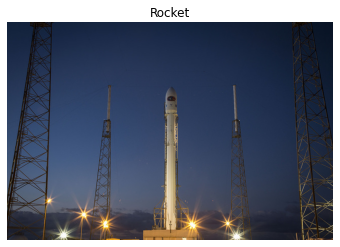

In [5]:
show_image(rocket, 'Rocket')

## Making an image grayscale 

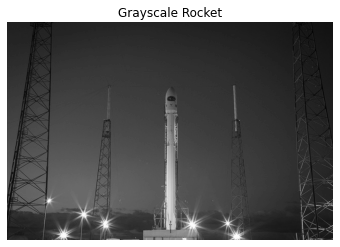

In [6]:
from skimage import color 

grayscale_rocket = color.rgb2gray(rocket)
show_image(grayscale_rocket, 'Grayscale Rocket')

## Images as NdArrays

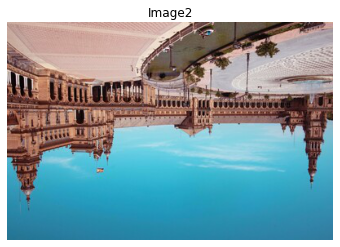

<class 'numpy.ndarray'>


In [11]:
image2 = plt.imread('image_folder/palace.jpg')
show_image(image2, 'Image2')
print(type(image2))

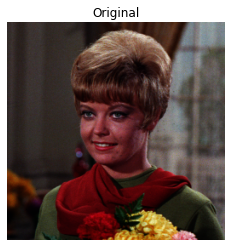

In [14]:
image3 = plt.imread('image_folder/girl.tiff')
show_image(image3, 'Original')

## Breaking down images into RGB 

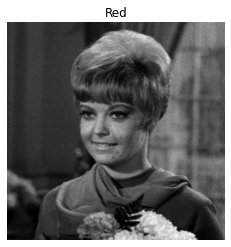

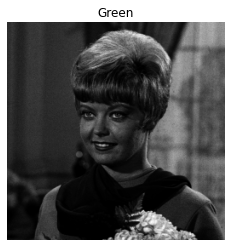

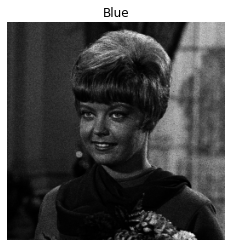

In [15]:
red = image3[:,:,0]
green = image3[:,:,1]
blue = image3[:,:,2]

show_image(red, 'Red')
show_image(green, 'Green')
show_image(blue, 'Blue')

In [16]:
image3.shape

(256, 256, 3)

In [17]:
image3.size

196608

The size is calculated by the multiplying the values of the shape

## Flipping Images

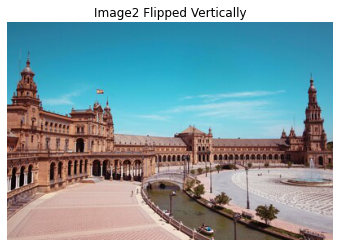

In [19]:
import numpy as np

image2_flipped_up = np.flipud(image2)
show_image(image2_flipped_up, 'Image2 Flipped Vertically')

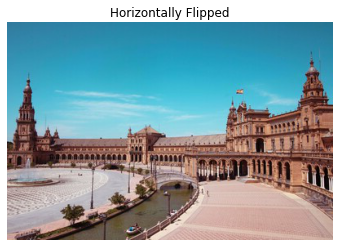

In [20]:
image2_horizontally_flipped = np.fliplr(image2_flipped_up)
show_image(image2_horizontally_flipped, 'Horizontally Flipped')

## Using histograms 

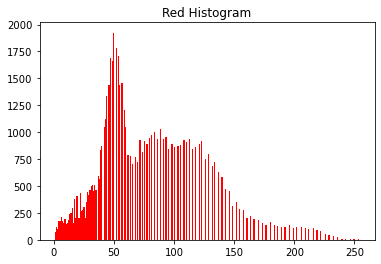

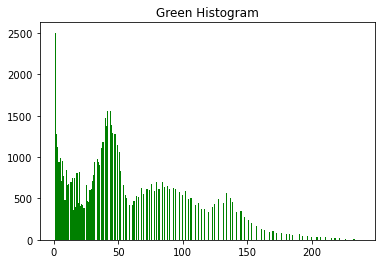

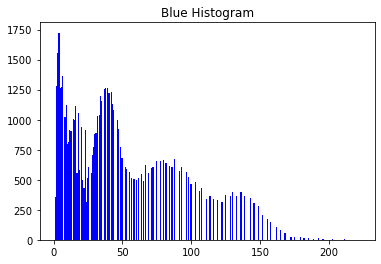

In [22]:
# Using values from the image of the girl

plt.hist(red.ravel(), bins = 256, color = 'r')
plt.title('Red Histogram')
plt.show()

plt.hist(green.ravel(), bins = 256, color = 'g')
plt.title('Green Histogram')
plt.show()

plt.hist(blue.ravel(), bins = 256, color = 'b')
plt.title('Blue Histogram')
plt.show()

## Thresholding 

#### Helps to isolate objects, facial detection, etc.

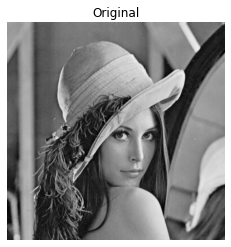

(512, 512)


In [42]:
image4 = plt.imread('image_folder/woman.png')
show_image(image4, 'Original')

print(image4.shape)

In order to apply thresholding, the image must first be turned into black and white so that each pixels value will turn 

white(255) if > thresh 


black (0) if < thresh 

<ipython-input-43-d0aaa16d2064>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image4_gray = color.rgb2gray(image4)


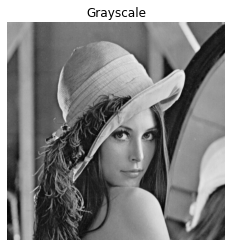

In [43]:
# Not neccessary step because image is already grayscale 
image4_gray = color.rgb2gray(image4)

show_image(image4_gray, 'Grayscale')

In [44]:
image4_gray.shape

(512, 512)

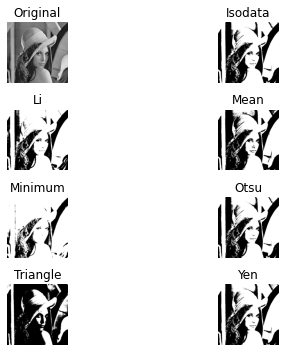

In [47]:
from skimage.filters import try_all_threshold 

fig, ax = try_all_threshold(image4, verbose = False)

plt.show(fig,ax)

## Optimal Thresh Value 

#### Global Thresh - based off all pixels and better for uniform backgrounds

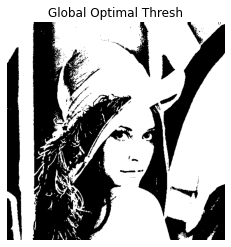

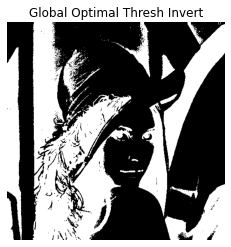

In [55]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image4)

binary = image4 > thresh

binary_invert = image4 <= thresh

show_image(binary, 'Global Optimal Thresh')
show_image(binary_invert, 'Global Optimal Thresh Invert')

#### Local Thresh - based off specified block size and better for uneven backgrounds 

In [58]:
from skimage.filters import threshold_local

block_size = 39

local_thresh = threshold_local(image4, block_size, offset = 10)

binary_local = image4 > local_thresh
